In [1]:
#Exp 10 naïve baise with spam dataset
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Load dataset
df = pd.read_csv(r"/content/spam.csv",encoding='latin-1')
print(df.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

In [5]:
# Step 2: Keep only label and text columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']   # rename columns

In [6]:
# Step 3: Clean labels
df['label'] = df['label'].str.lower()

In [7]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.25, random_state=42, stratify=df['label']
)

In [8]:
# Step 5: Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
# Step 6: Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [11]:
# Step 7: Predict
y_pred = model.predict(X_test_vec)

In [12]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9691313711414213

Confusion Matrix:
 [[1206    0]
 [  43  144]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       1.00      0.77      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



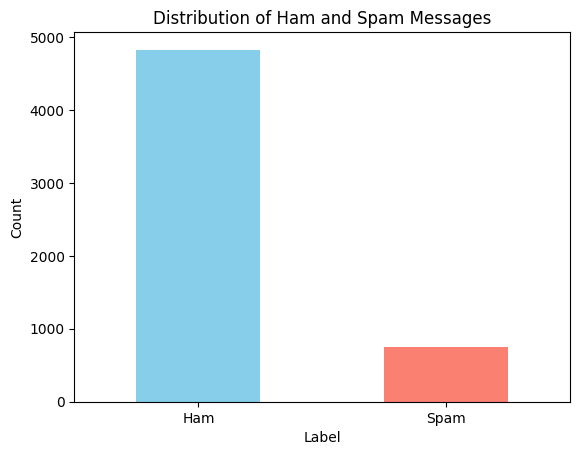

In [ ]:
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Ham and Spam Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], rotation=0)
plt.show()

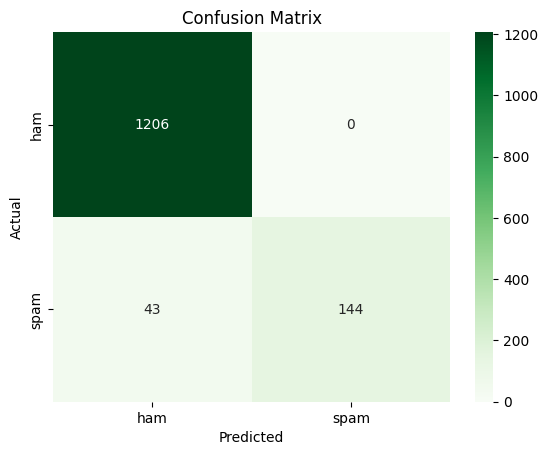

In [13]:
# Step 9: Simple Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=['ham','spam'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()